In [62]:
!pip install bayesian-optimization

In [63]:
!pip install optuna


In [64]:


import numpy as np #Operaciones matemáticas rápidas sobre matrices
import pandas as pd #biblioteca de análisis y manipulación de datos para Python
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns #permite generar fácilmente gráficos
import statsmodels.api as sm

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [65]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
# Especifica la ruta al archivo en Google Drive
file_path = '/content/drive/My Drive/DATASET_BALANCEADO_LIST.csv'
df = pd.read_csv(file_path)
df

,DIA,HORA_INFRACCION,ARMA,EDAD,LUGAR,SEXO,ANTECEDENTES,AREA_DEL_HECHO,DISTRITO,PRESUNTA_MOTIVACION
0,3,0,1,1,1,1,1,1,2,1
1,3,2,2,2,1,1,1,1,1,2
2,2,0,2,2,2,1,1,1,1,2
3,4,2,1,3,1,1,1,1,3,1
4,3,5,1,2,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...
11763,4,2,5,4,2,2,2,2,3,6
11764,4,2,5,4,2,2,2,2,3,6
11765,4,2,5,4,2,2,2,2,3,6
11766,4,2,5,4,2,2,2,2,3,6


In [67]:


#verifico datos nulos
df.isnull().sum()

,0
DIA,0
HORA_INFRACCION,0
ARMA,0
EDAD,0
LUGAR,0
SEXO,0
ANTECEDENTES,0
AREA_DEL_HECHO,0
DISTRITO,0
PRESUNTA_MOTIVACION,0


In [68]:

ds=pd.DataFrame(df)
#Presenta el numero de filas
print("El número de filas(observaciones) es: ",ds.shape[0])

#Presenta el numero de columnas
print("El número de columnas(variables) es: ",len(ds.columns))

El número de filas(observaciones) es:  11768
El número de columnas(variables) es:  10


In [69]:

# tipos de la variables
ds.dtypes

,0
DIA,int64
HORA_INFRACCION,int64
ARMA,int64
EDAD,int64
LUGAR,int64
SEXO,int64
ANTECEDENTES,int64
AREA_DEL_HECHO,int64
DISTRITO,int64
PRESUNTA_MOTIVACION,int64


In [70]:
print(df['PRESUNTA_MOTIVACION'].unique())# datos en texto

[1 2 3 4 5 6]


In [71]:
print(df['DISTRITO'].unique())# datos en texto

[2 1 3]


In [72]:
print(df['ANTECEDENTES'].unique())# datos en texto

[1 2]


In [73]:
print(df['AREA_DEL_HECHO'].unique())# datos en texto

[1 2]


In [74]:
print(df['LUGAR'].unique())# datos en texto

[1 2]


In [75]:
print(df['DIA'].unique())# datos en texto

[3 2 4 1]


In [76]:
df['DIA'].value_counts()

,count
DIA,
1,3941
2,2717
3,2700
4,2410


In [77]:
print(df['EDAD'].unique())# datos en texto

[1 2 3 4]


In [78]:
print(df['HORA_INFRACCION'].unique())# datos en texto

[0 2 5 1]


In [79]:
print(df['ARMA'].unique())# datos en texto

[1 2 3 4 5]


In [80]:
print(df['SEXO'].unique())# datos en texto

[1 2]


In [81]:
df.head()

,DIA,HORA_INFRACCION,ARMA,EDAD,LUGAR,SEXO,ANTECEDENTES,AREA_DEL_HECHO,DISTRITO,PRESUNTA_MOTIVACION
0,3,0,1,1,1,1,1,1,2,1
1,3,2,2,2,1,1,1,1,1,2
2,2,0,2,2,2,1,1,1,1,2
3,4,2,1,3,1,1,1,1,3,1
4,3,5,1,2,1,1,1,1,1,2


In [82]:
df.sample(10)

,DIA,HORA_INFRACCION,ARMA,EDAD,LUGAR,SEXO,ANTECEDENTES,AREA_DEL_HECHO,DISTRITO,PRESUNTA_MOTIVACION
5439,4,2,1,1,1,1,1,1,1,2
4625,1,5,1,2,1,1,1,1,2,2
9763,3,1,4,3,2,2,2,2,3,4
11220,4,2,5,4,2,2,2,2,3,6
5134,3,5,1,2,1,1,1,1,2,2
519,2,5,1,2,1,1,1,1,3,2
3577,3,5,1,2,2,1,1,1,3,2
2391,2,5,1,2,1,1,1,1,1,2
1144,1,2,5,3,2,1,2,1,2,1
10840,4,2,5,4,2,2,2,2,3,6


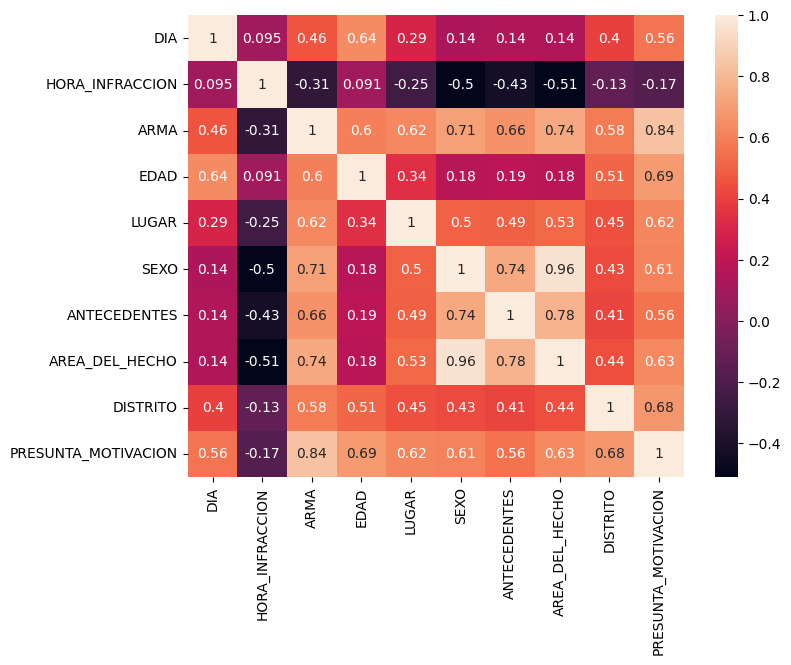

In [83]:

#corelacion
corr_df = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [84]:

X = df.iloc[:, [3,7,9,2,8,5,4,6,1]] # atributos de entrada seran las primeras columnas
Y = df.iloc[:,[0]] # atributos de destino

#presentacion de los atributos de entrada
X.head()

,EDAD,AREA_DEL_HECHO,PRESUNTA_MOTIVACION,ARMA,DISTRITO,SEXO,LUGAR,ANTECEDENTES,HORA_INFRACCION
0,1,1,1,1,2,1,1,1,0
1,2,1,2,2,1,1,1,1,2
2,2,1,2,2,1,1,2,1,0
3,3,1,1,1,3,1,1,1,2
4,2,1,2,1,1,1,1,1,5


In [85]:

#presentacion de los atributos de destino
Y.head()

,DIA
0,3
1,3
2,2
3,4
4,3


In [86]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=7)

print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 9414 datos para entrenamiento y 2354 datos para prueba


In [87]:


X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9414 entries, 80 to 9412
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   EDAD                 9414 non-null   int64
 1   AREA_DEL_HECHO       9414 non-null   int64
 2   PRESUNTA_MOTIVACION  9414 non-null   int64
 3   ARMA                 9414 non-null   int64
 4   DISTRITO             9414 non-null   int64
 5   SEXO                 9414 non-null   int64
 6   LUGAR                9414 non-null   int64
 7   ANTECEDENTES         9414 non-null   int64
 8   HORA_INFRACCION      9414 non-null   int64
dtypes: int64(9)
memory usage: 735.5 KB


In [88]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score

# Función de objetivo para la optimización de hiperparámetros
def objective(trial):
    # Definición de los hiperparámetros
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 25)

    # Crear y entrenar el modelo
    model = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Devuelve la métrica de precisión
    return precision_score(y_test, y_pred, average='micro')

# Crear un estudio
study = optuna.create_study(direction='maximize')  # Maximizar la precisión
study.optimize(objective, n_trials=100)  # Ejecutar la optimización

# Mostrar los mejores parámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(study.best_params)
print("Mejor precisión:", study.best_value)



[I 2024-12-01 20:27:37,391] A new study created in memory with name: no-name-548a07dc-0796-41ed-9728-76d7c0b94ffc
[I 2024-12-01 20:27:37,426] Trial 0 finished with value: 0.5649957519116398 and parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 25}. Best is trial 0 with value: 0.5649957519116398.
[I 2024-12-01 20:27:37,461] Trial 1 finished with value: 0.5934579439252337 and parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 12}. Best is trial 1 with value: 0.5934579439252337.
[I 2024-12-01 20:27:37,509] Trial 2 finished with value: 0.5917587085811384 and parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.5934579439252337.
[I 2024-12-01 20:27:37,575] Trial 3 finished with value: 0.594732370433305 and parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 19}. Best is trial 3 with val

Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 6}
Mejor precisión: 0.6011045029736618


In [111]:

#Cargamos la libreria DecisionTreeClasifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report


#Llamamos al constructor del arbol de decision
classifier = DecisionTreeClassifier(max_depth=7, min_samples_split=8,min_samples_leaf=6, criterion='entropy')

#Entrenamos el modelo
arbol_modelo = classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)


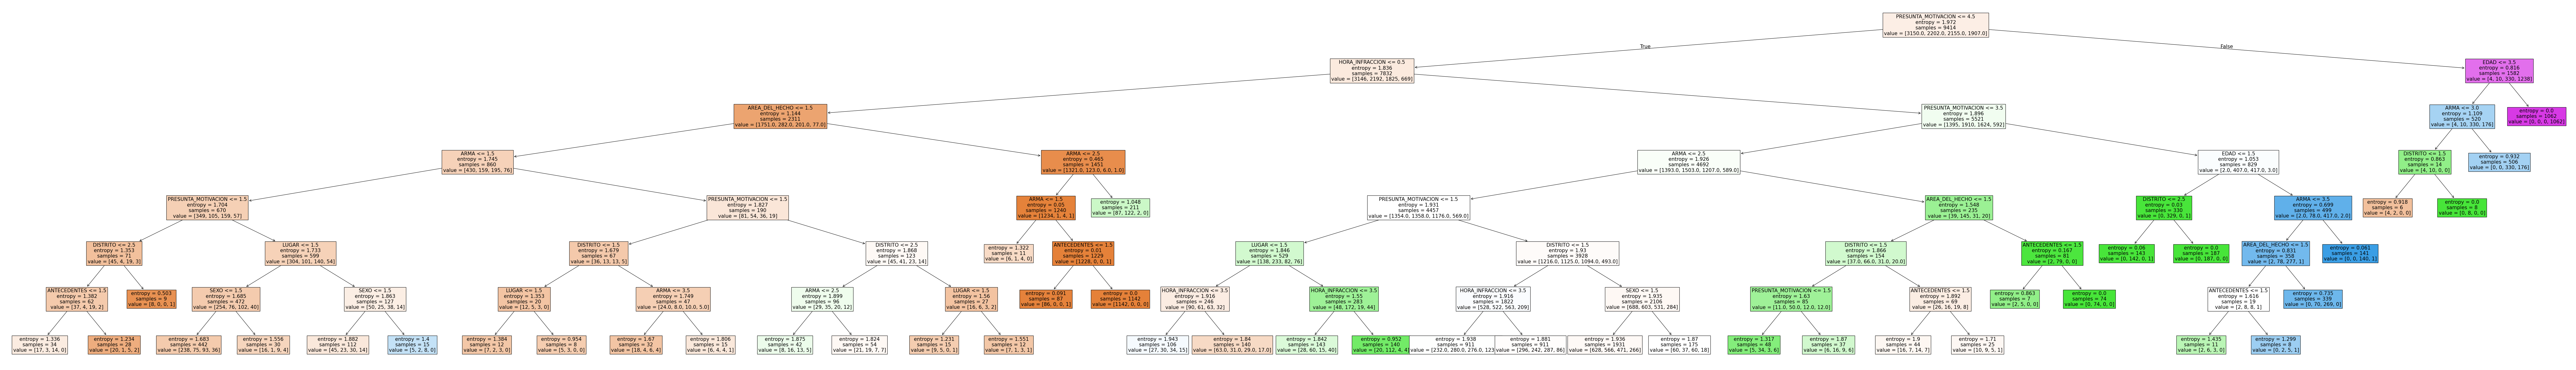

In [112]:


figura_arbol = plt.figure(figsize=(140,20)) # Le indicamos las dimensiones que queremos que tenga
plot_tree(arbol_modelo,feature_names=X.columns,filled=True, fontsize=15)
plt.show()

In [113]:


figura_arbol.savefig("día_asesinatos.png")

In [114]:

# Resumen de las predicciones hechas por el clasificador
from sklearn import metrics
reporte = metrics.classification_report(y_test, y_pred,output_dict=True)
pre = pd.DataFrame(reporte).transpose()
print(pre)
pre.to_excel("resumen_día.xlsx")

              precision    recall  f1-score      support
1              0.514774  0.836915  0.637458   791.000000
2              0.516832  0.506796  0.511765   515.000000
3              0.739927  0.370642  0.493888   545.000000
4              1.000000  0.576541  0.731400   503.000000
accuracy       0.601105  0.601105  0.601105     0.601105
macro avg      0.692883  0.572724  0.593627  2354.000000
weighted avg   0.671034  0.601105  0.596793  2354.000000


In [115]:
from sklearn import metrics
import pandas as pd

reporte = metrics.classification_report(y_test, y_pred, output_dict=True)

# Extraer solo la precisión de cada clase, excluyendo métricas agregadas
precision = {class_name: metrics['precision'] for class_name, metrics in reporte.items() if isinstance(metrics, dict)}

# Convertir a DataFrame
precision_df = pd.DataFrame(list(precision.items()), columns=['Clase', 'Precisión'])

# Imprimir el DataFrame
print(precision_df)


          Clase  Precisión
0             1   0.514774
1             2   0.516832
2             3   0.739927
3             4   1.000000
4     macro avg   0.692883
5  weighted avg   0.671034


In [116]:

y_test.head()

,DIA
0,2
1,2
2,1
3,1
4,4


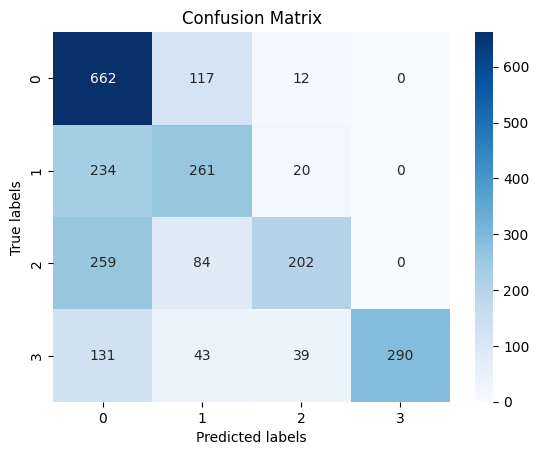

In [117]:

#Matriz de confusion
matriz=confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(matriz, annot=True, cmap="Blues",fmt='g');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

In [118]:

cm = confusion_matrix(y_test, y_pred)

mc= pd.DataFrame(cm)
print(mc)
mc.to_excel("matriz_confusion_día.xlsx")

     0    1    2    3
0  662  117   12    0
1  234  261   20    0
2  259   84  202    0
3  131   43   39  290


In [119]:

#Para concatenar variables
import pandas as pd

prediccion = pd.DataFrame(y_pred,columns=['dia_prediccion'])
original = y_test
original.reset_index(drop=True, inplace=True)
df_combined = pd.concat([prediccion,original], axis=1)
df_combined.head(10)

,dia_prediccion,DIA
0,3,2
1,2,2
2,1,1
3,2,1
4,1,4
5,4,4
6,3,4
7,1,3
8,3,3
9,1,2


In [120]:
from sklearn import model_selection
from sklearn.metrics import make_scorer, precision_score, accuracy_score, recall_score

def v_cruzada(arbol_modelo, X_train, y_train):
    # Convertir y_train a un array unidimensional
    y_train = y_train.values.ravel()

    # Definir los scorers para precisión, accuracy y recall
    precision_scorer = make_scorer(precision_score, average='micro')
    accuracy_scorer = make_scorer(accuracy_score)  # No necesita parámetro average
    recall_scorer = make_scorer(recall_score, average='micro')

    seed = 7
    kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle=True)  # shuffle para activar el random state

    # Realiza la validación cruzada para precisión
    cv_results_precision = model_selection.cross_val_score(arbol_modelo, X_train, y_train, cv=kfold, scoring=precision_scorer)
    print("Iteraciones validación cruzada (Precisión):\n", cv_results_precision)
    msg_precision = "%f (%f)" % (cv_results_precision.mean(), cv_results_precision.std())
    print("Precisión media:\n", msg_precision)

    # Realiza la validación cruzada para accuracy
    cv_results_accuracy = model_selection.cross_val_score(arbol_modelo, X_train, y_train, cv=kfold, scoring=accuracy_scorer)
    print("Iteraciones validación cruzada (Accuracy):\n", cv_results_accuracy)
    msg_accuracy = "%f (%f)" % (cv_results_accuracy.mean(), cv_results_accuracy.std())
    print("Accuracy media:\n", msg_accuracy)

    # Realiza la validación cruzada para recall
    cv_results_recall = model_selection.cross_val_score(arbol_modelo, X_train, y_train, cv=kfold, scoring=recall_scorer)
    print("Iteraciones validación cruzada (Recall):\n", cv_results_recall)
    msg_recall = "%f (%f)" % (cv_results_recall.mean(), cv_results_recall.std())
    print("Recall media:\n", msg_recall)



In [121]:

#Validación cruzada
v_cruzada(arbol_modelo, X_train,y_train)

Iteraciones validación cruzada (Precisión):
 [0.58842273 0.57939458 0.58311206 0.58629846 0.58182784]
Precisión media:
 0.583811 (0.003206)
Iteraciones validación cruzada (Accuracy):
 [0.58842273 0.57886352 0.58311206 0.58629846 0.58182784]
Accuracy media:
 0.583705 (0.003356)
Iteraciones validación cruzada (Recall):
 [0.58842273 0.57886352 0.58311206 0.58629846 0.58182784]
Recall media:
 0.583705 (0.003356)


In [122]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Assuming y_pred and y_test are defined
print('Precision: ', precision_score(y_test, y_pred, average='micro') * 100)
print('Accuracy: ', accuracy_score(y_test, y_pred) * 100)
print('Recall: ', recall_score(y_test, y_pred, average='micro') * 100)

Precision:  60.11045029736618
Accuracy:  60.11045029736618
Recall:  60.11045029736618


In [123]:
df_combined['DIA'] = df_combined['DIA'].apply(lambda x:
                                                  'Sábado, Domingo' if x == 1 else
                                                  'Martes, Viernes' if x == 2 else
                                                  'Miércoles' if x == 3 else
                                                   'Jueves' )




In [124]:
df_combined['dia_prediccion'] = df_combined['dia_prediccion'].apply(lambda x:
                                                  'Sábado, Domingo' if x == 1 else
                                                  'Martes, Viernes' if x == 2 else
                                                  'Miércoles' if x == 3 else
                                                  'Jueves' )



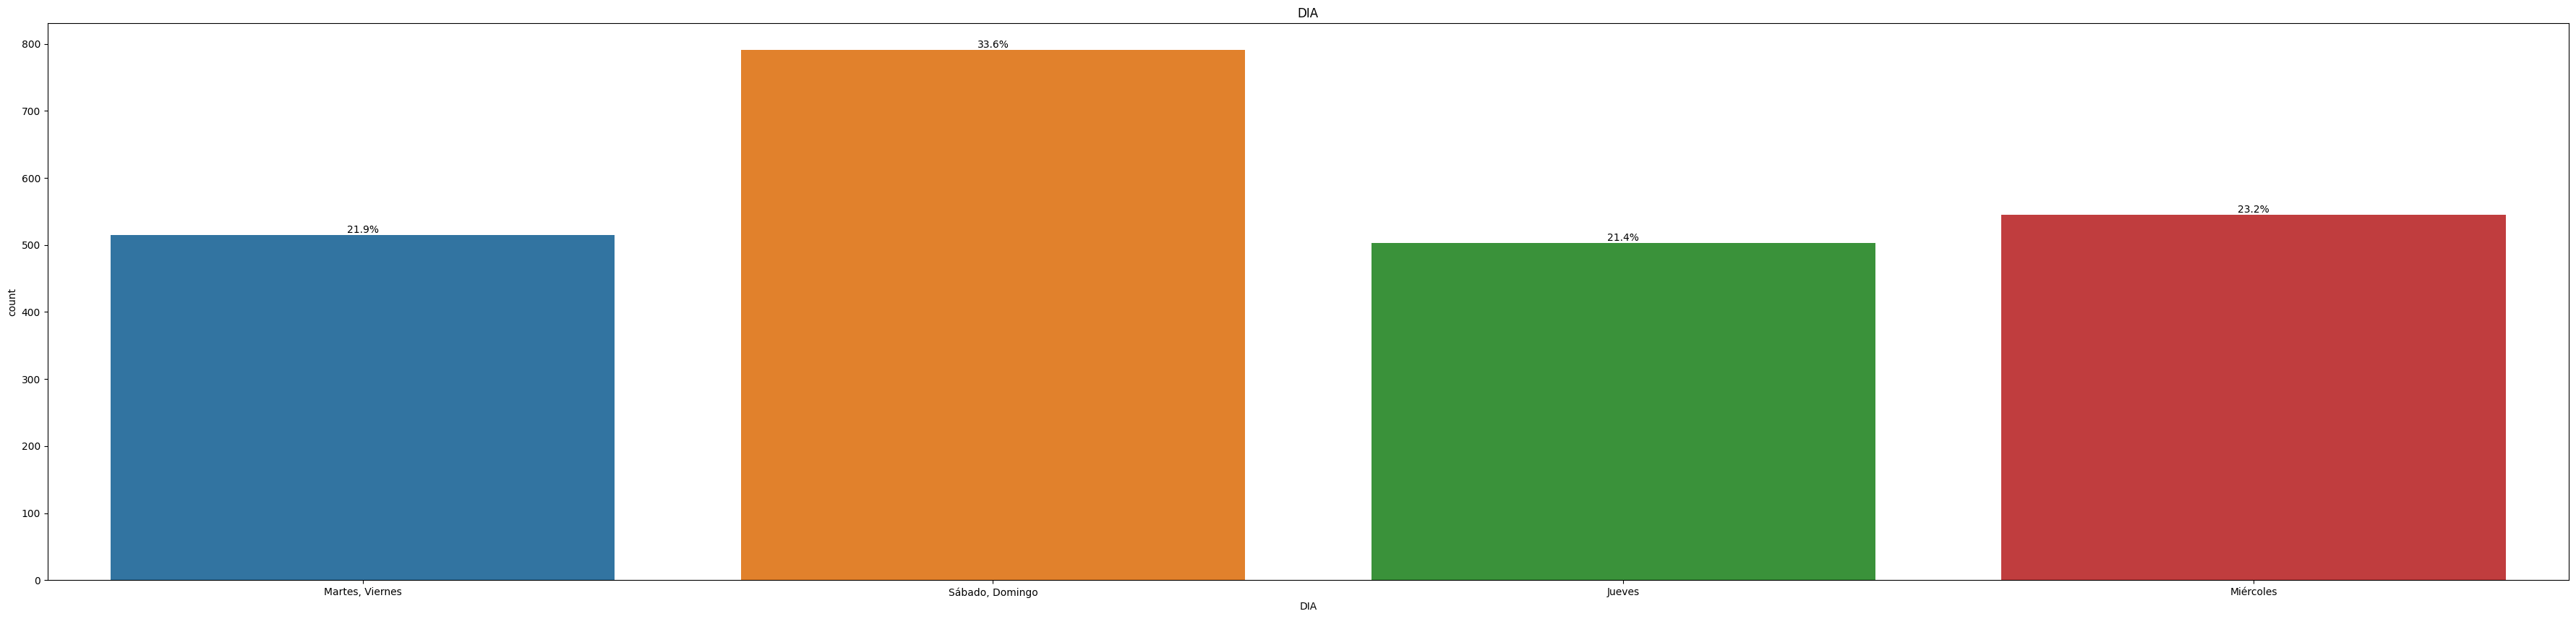

In [125]:

import seaborn as sns #permite generar fácilmente elegantes gráficos, proporciona una interfaz de alto nivel que es realmente sencilla de aprender.
ax = plt.subplots(figsize = (45,10))
ncount=len(df_combined)
sns.countplot(x='DIA',hue = 'DIA', data = df_combined, ax = ax[1]) #Muestre el conteo de observaciones en cada contenedor categórico usando barras.
ax[1].set_title('DIA')

for p in ax[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[1].annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
            ha='center', va='bottom') # set the alignment of the text

#Guardamos la figura de barras original
ax[0].savefig("barras_original_DIA.png")

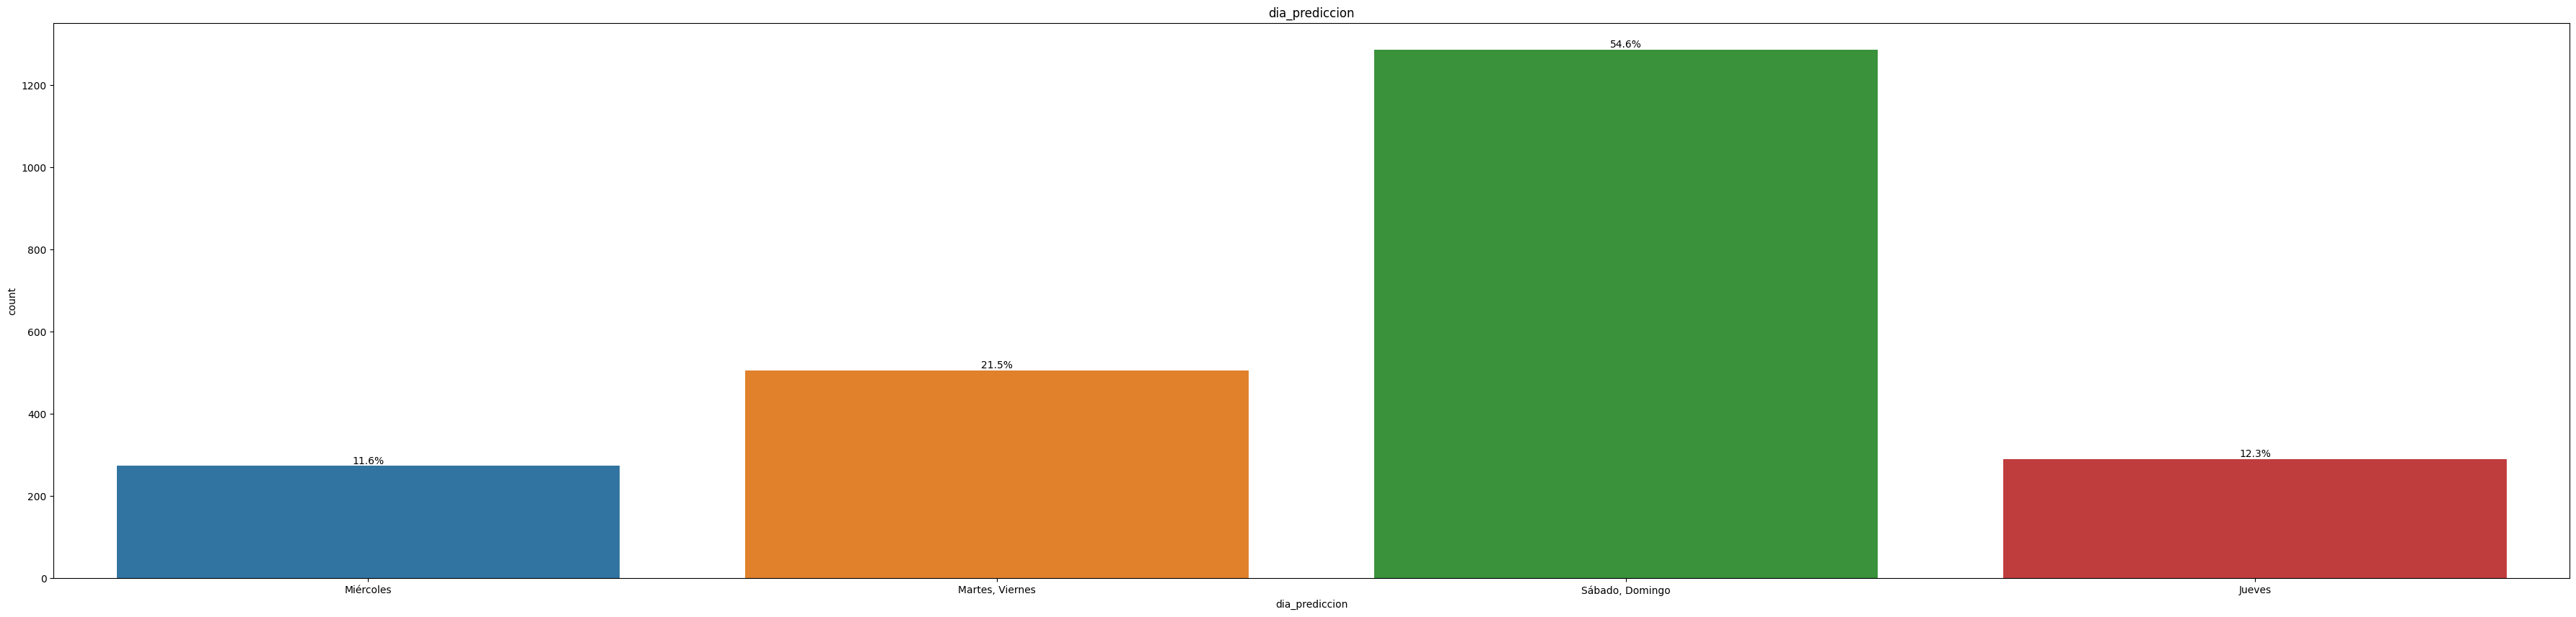

In [126]:


ax = plt.subplots(figsize = (45,10))
ncount=len(df_combined)
sns.countplot(x='dia_prediccion',hue = 'dia_prediccion', data = df_combined, ax = ax[1]) #Muestre el conteo de observaciones en cada contenedor categórico usando barras.
ax[1].set_title('dia_prediccion')


for p in ax[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[1].annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
            ha='center', va='bottom') # set the alignment of the text

#Guardamos la figura de barras de predicción
ax[0].savefig("barras_prediccion_dia.png")